In [29]:
import numpy as np, math
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [15]:
image_size = 20
image = np.random.randn(image_size, image_size)

In [16]:
kernelN = 7

In [17]:
Y, X = np.meshgrid(np.linspace(-3,3, kernelN), np.linspace(-3,3, kernelN))

In [18]:
kernel = np.exp(- (X**2 + Y**2) / 7)

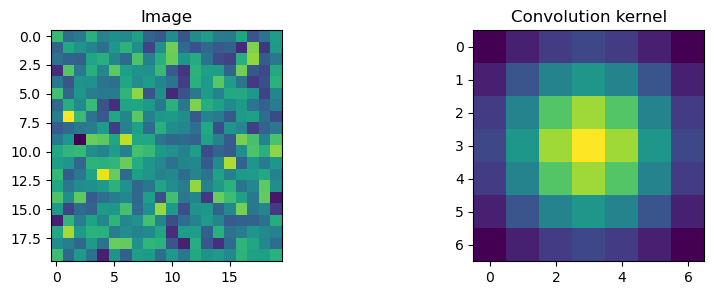

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].imshow(image)
ax[0].set_title("Image")


ax[1].imshow(kernel)
ax[1].set_title("Convolution kernel")
plt.show()

In [20]:
image.shape, kernel.shape

((20, 20), (7, 7))

In [21]:
new_img_size_rows = image.shape[0] - kernel.shape[0]
new_img_size_cols = image.shape[-1] - kernel.shape[-1]

In [22]:
filtered_image = np.zeros((image_size, image_size)) 
half_kernel = kernelN//2

In [23]:
for i in range(half_kernel, image_size-half_kernel):
    for j in range(half_kernel, image_size-half_kernel):
        # Omitting the last 7 completely - not correct
        # exmpl = image[i+kernelN, j+kernelN] * kernel
        # filtered_image[i,j] = np.sum(exmpl)

        exmpl = image[i - half_kernel : i + half_kernel + 1, j - half_kernel : j + half_kernel + 1] * kernel
        filtered_image[i,j] = np.sum(exmpl)

In [24]:
convout_scipy = convolve2d(image, kernel, mode="valid")

In [25]:
convout_scipy.shape

(14, 14)

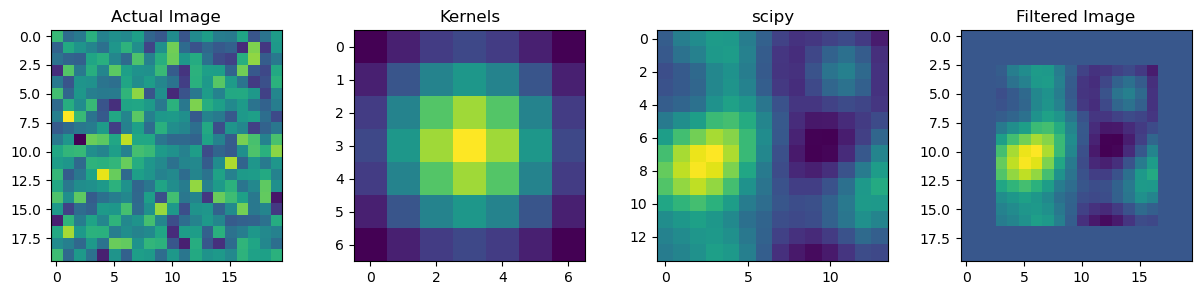

In [26]:
fig, ax = plt.subplots(1, 4, figsize=(15,3))

ax[0].imshow(image)
ax[0].set_title("Actual Image")

ax[1].imshow(kernel)
ax[1].set_title("Kernels")

ax[2].imshow(convout_scipy)
ax[2].set_title("scipy")

ax[3].imshow(filtered_image)
ax[3].set_title("Filtered Image")

plt.show()

In [59]:
rp_bild = cv2.imread("./Ripon-Building-in-Chennai-PlaneMad-wikimedia.jpg")
rp_bild = cv2.cvtColor(rp_bild, cv2.COLOR_BGR2RGB)

In [60]:
rp_bild_2d = np.mean(rp_bild, axis=2)
rp_bild_2d = rp_bild_2d/np.max(rp_bild_2d)

Text(0.5, 1.0, '2d_converted_image')

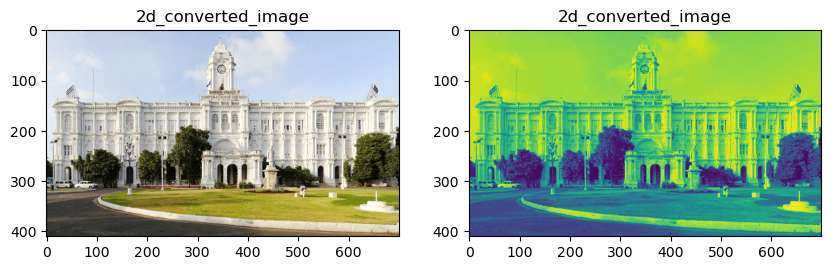

In [61]:
fix, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].imshow(rp_bild)
ax[0].set_title("2d_converted_image")

ax[1].imshow(rp_bild_2d)
ax[1].set_title("2d_converted_image")

In [62]:
# introducting Kernels

vk = np.array([[1, 1, 1],
               [0, 0, 0],
               [-1, -1, -1]])

hk = np.array([[1, 0, -1],
               [1, 0, -1],
               [1, 0, -1]])

In [63]:
vk_bild = convolve2d(rp_bild_2d, vk, mode='valid')
hk_bild = convolve2d(rp_bild_2d, hk, mode = 'valid')

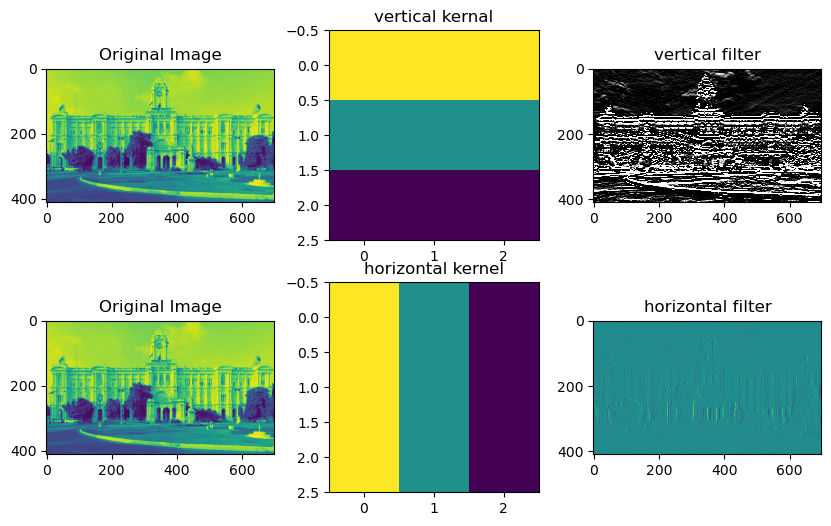

In [64]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

ax[0,0].imshow(rp_bild_2d)
ax[0,0].set_title('Original Image')

ax[0,1].imshow(vk)
ax[0,1].set_title('vertical kernal')

ax[0,2].imshow(vk_bild, cmap='gray', vmin=0, vmax=.07)
ax[0,2].set_title('vertical filter')


ax[1,0].imshow(rp_bild_2d)
ax[1,0].set_title('Original Image')

ax[1,1].imshow(hk)
ax[1,1].set_title('horizontal kernel')

ax[1,2].imshow(hk_bild)
ax[1,2].set_title('horizontal filter')

plt.show()

In [72]:
import torch
import  torch.nn.functional as F

In [73]:
vk_tnsr = torch.tensor(vk).view(1,1,3,3).double()
hk_tnsr = torch.tensor(hk).view(1,1,3,3).double()

In [74]:
rpn_bld_tnsr = torch.tensor(rp_bild_2d).view(1, 1, rp_bild_2d.shape[0], rp_bild_2d.shape[-1])

In [75]:
vk_bld_tnsr = F.conv2d(rpn_bld_tnsr, vk_tnsr)
hk_bld_tnsr = F.conv2d(rpn_bld_tnsr, hk_tnsr)

print(vk_bld_tnsr.shape, hk_bld_tnsr.shape)

torch.Size([1, 1, 408, 698]) torch.Size([1, 1, 408, 698])


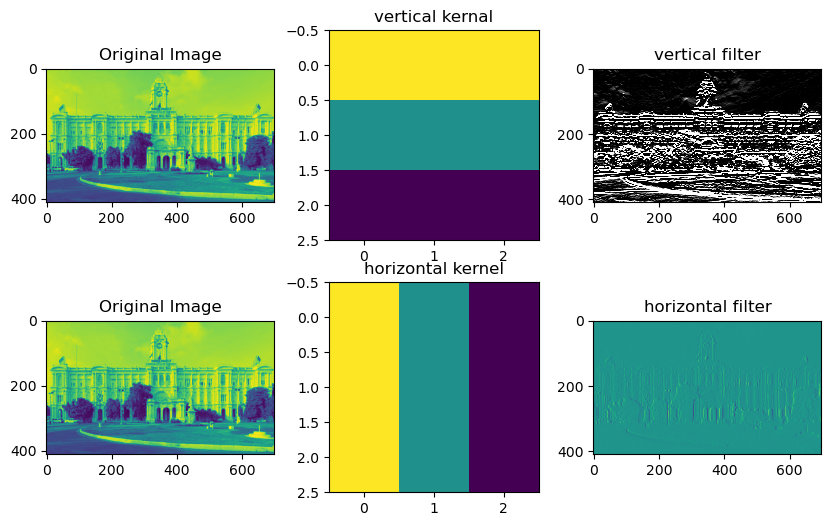

In [82]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

ax[0,0].imshow(rpn_bld_tnsr.squeeze())
ax[0,0].set_title('Original Image')

ax[0,1].imshow(vk_tnsr.squeeze())
ax[0,1].set_title('vertical kernal')

ax[0,2].imshow(vk_bld_tnsr.squeeze(), cmap='gray', vmin=0, vmax=.07)
ax[0,2].set_title('vertical filter')


ax[1,0].imshow(rpn_bld_tnsr.squeeze())
ax[1,0].set_title('Original Image')

ax[1,1].imshow(hk_tnsr.squeeze())
ax[1,1].set_title('horizontal kernel')

ax[1,2].imshow(hk_bld_tnsr.squeeze())
ax[1,2].set_title('horizontal filter')

plt.show()

In [105]:
img = torch.arange(1, 26).view(5,5)
krnl = torch.vstack((torch.full((1, 3),-1), torch.full((1, 3),0), torch.full((1, 3),1)))
krnl
# krnl.shape

tensor([[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]])

In [122]:
def plt_values(img, ax, title = ""):
    # Annotate each pixel with its value
    ax.imshow(img)  # Display grayscale image
    ax.set_title(title)
    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            ax.text(j, i, str(img[i, j].item()), ha='center', va='center', color='white')
    ax.axis('off')

In [125]:
krnl.T

tensor([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]])

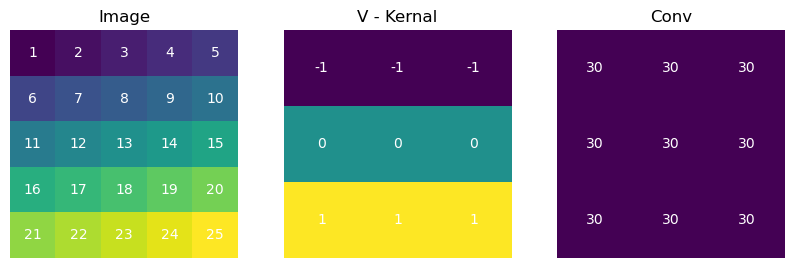

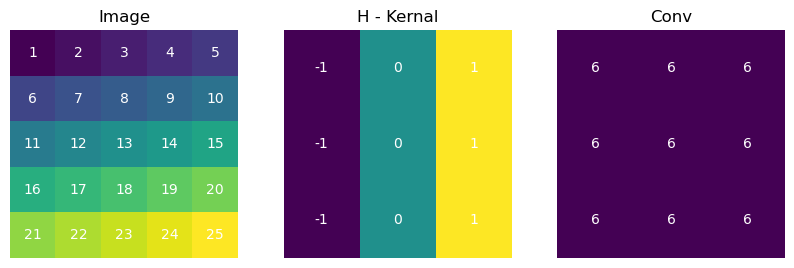

In [127]:
fig, ax =plt.subplots(1,3, figsize=(10,3))

plt_values(img, ax[0], title="Image")
plt_values(krnl, ax[1], title="V - Kernal")

conv_img = F.conv2d(img.view(1,1,img.shape[0],img.shape[-1]), krnl.view(1,1,krnl.shape[0],krnl.shape[-1])).squeeze()
plt_values(conv_img, ax[2], title="Conv")

fig, ax =plt.subplots(1,3, figsize=(10,3))
plt_values(img, ax[0], title="Image")
plt_values(krnl.T, ax[1], title="H - Kernal")

conv_img = F.conv2d(img.view(1,1,img.shape[0],img.shape[-1]), krnl.T.view(1,1,krnl.shape[0],krnl.shape[-1])).squeeze()
plt_values(conv_img, ax[2], title="Conv")

plt.show()